## Scottish Emissions Data: Predicting GHG emissions over time

In a previous study, I looked at whether Scottish industries were on track to meet the Scottish government's carbon reduction goals.

Today, we're using the same dataset, cleaned from that project, to look instead at the pollutant gases tracked by each industry. 

We will do some analytical exploration before then working on a model which will predict the trajectory of these pollutants into the future.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv = 'scot_emissions_clean.csv' #cleaned data from previous work
data = pd.read_csv(csv)
df = pd.DataFrame(data)
df.head(5)

,Unnamed: 0,ncformat,ipcc_code,ipcc_name,sourcename,crf,old_sg_name,ccp_category,pollutant,emission_year,mt_co2e,base_level
0,1,Agriculture,1A4ci,1A4ci_Agriculture/Forestry/Fishing:Stationary,Agriculture - stationary combustion,Energy,Agriculture and related land use,Agriculture,CH4,1990,0.000887,0.000887
1,2,Agriculture,1A4ci,1A4ci_Agriculture/Forestry/Fishing:Stationary,Agriculture - stationary combustion,Energy,Agriculture and related land use,Agriculture,CH4,1995,0.000778,0.000887
2,3,Agriculture,1A4ci,1A4ci_Agriculture/Forestry/Fishing:Stationary,Agriculture - stationary combustion,Energy,Agriculture and related land use,Agriculture,CH4,1998,0.000612,0.000887
3,4,Agriculture,1A4ci,1A4ci_Agriculture/Forestry/Fishing:Stationary,Agriculture - stationary combustion,Energy,Agriculture and related land use,Agriculture,CH4,1999,0.000585,0.000887
4,5,Agriculture,1A4ci,1A4ci_Agriculture/Forestry/Fishing:Stationary,Agriculture - stationary combustion,Energy,Agriculture and related land use,Agriculture,CH4,2000,0.000600,0.000887


For this project we are focusing just on the pollutant, so our columns of interest are:
- **ncformat**: this column represetned the current convention for naming industries in the Scottish Government
- **pollutant**: the gas in question
- **emission_year**: the year the emissions were calculated
- **mt_co2e**: the emissions of that gas, converted into their equivalent in metric tonnes of carbon dioxide

For ease, we'll drop the others

In [3]:
df = df.drop(columns=['Unnamed: 0','ipcc_code', 'ipcc_name', 'sourcename', 'crf', 'old_sg_name', 'ccp_category', 'base_level'])
df.head(10)

,ncformat,pollutant,emission_year,mt_co2e
0,Agriculture,CH4,1990,0.000887
1,Agriculture,CH4,1995,0.000778
2,Agriculture,CH4,1998,0.000612
3,Agriculture,CH4,1999,0.000585
4,Agriculture,CH4,2000,0.000600
5,Agriculture,CH4,2001,0.000587
6,Agriculture,CH4,2002,0.000603
7,Agriculture,CH4,2003,0.000615
8,Agriculture,CH4,2004,0.000669
9,Agriculture,CH4,2005,0.000705


In [4]:
#Going to add a column which allows us to group our years together easily
#This will come in helpful later to improve data visualisation

labels = {'1990-1994':[1990,1991,1992,1993,1994], '1995-1999':np.arange(1995,2000,1),
         '2000-2004':np.arange(2000,2006,1), '2005-2009':np.arange(2005,2010,1),
         '2010-2014':np.arange(2010,2014,1), '2015-2020':np.arange(2015,2021,1)}

reversed_dict = {val: key for key in labels for val in labels[key]}

df['grouped_year'] = df['emission_year'].map(reversed_dict)
df

,ncformat,pollutant,emission_year,mt_co2e,grouped_year
0,Agriculture,CH4,1990,0.000887,1990-1994
1,Agriculture,CH4,1995,0.000778,1995-1999
2,Agriculture,CH4,1998,0.000612,1995-1999
3,Agriculture,CH4,1999,0.000585,1995-1999
4,Agriculture,CH4,2000,0.000600,2000-2004
...,...,...,...,...,...
21652,Waste Management,N2O,2016,0.008555,2015-2020
21653,Waste Management,N2O,2017,0.009590,2015-2020
21654,Waste Management,N2O,2018,0.008700,2015-2020
21655,Waste Management,N2O,2019,0.009712,2015-2020


Let's take a quick look at the pollutant distribution 

In [5]:
#Setting up a colour dictionary for the plots
colours_dict = {'CH4':'gold', 'CO2':'mediumorchid', 'HFC':'salmon', 'N2O':'turquoise',
               'NF3':'darkseagreen', 'PFC':'deepskyblue', 'SF6':'hotpink'}

sns.set(style="whitegrid")

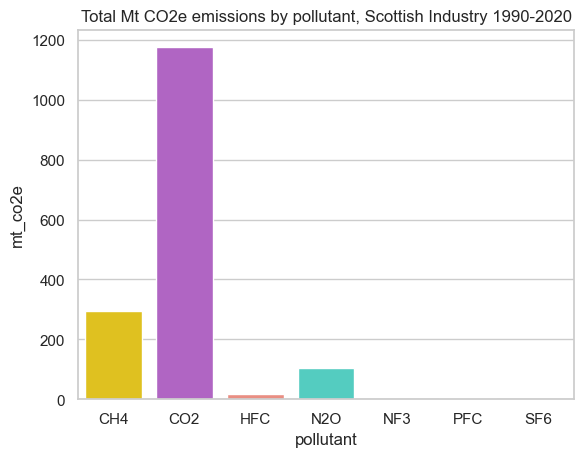

In [6]:
#Calculating the total emissions per each pollutant

pollutants_total = df.groupby('pollutant')['mt_co2e'].sum()
pollutants_total = pd.DataFrame(pollutants_total).reset_index()

ax1 = sns.barplot(data=pollutants_total, x='pollutant', y='mt_co2e', palette=colours_dict)
plt.title('Total Mt CO2e emissions by pollutant, Scottish Industry 1990-2020')
plt.show()

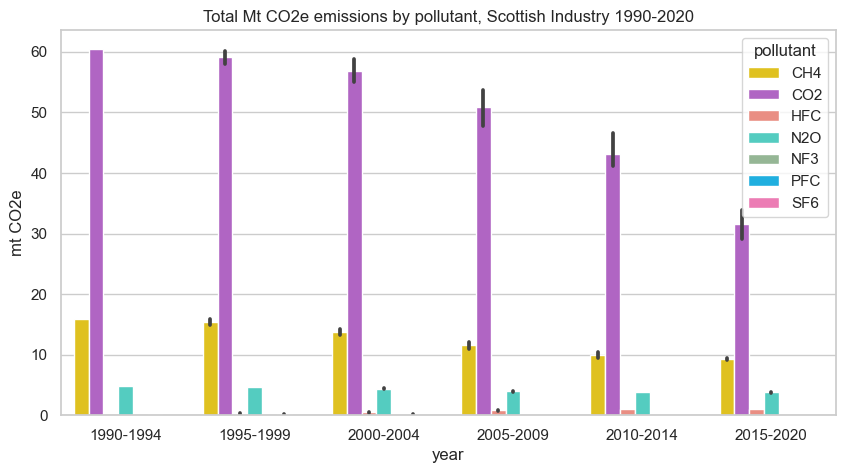

In [7]:
#Calculating the total emissions per each pollutant

#For ease of reading the chart, we will merge data for every 5 years
emissions_by_year = df.groupby(['pollutant', 'emission_year'])['mt_co2e'].sum()
emissions_by_year = pd.DataFrame(emissions_by_year).reset_index()

emissions_by_year['grouped_year'] = emissions_by_year['emission_year'].map(reversed_dict)

plt.figure(figsize=(10,5))

ax1 = sns.barplot(data=emissions_by_year, x='grouped_year', y='mt_co2e', hue='pollutant',
                 palette=colours_dict)
plt.title('Total Mt CO2e emissions by pollutant, Scottish Industry 1990-2020')
plt.xlabel('year')
plt.ylabel('mt CO2e')
plt.show()

We can see from the above that CO2 represents the largest pollutant being tracked by Scottish industry. 

The fact that CO2 dwarves other pollutants could be the result of a range of factors. It could be the most abundant gas, but also it could also be that CO2 is simply the most common to track across industries, given it is the best known greenhouse gas. Other gases may not have been tracked for as long, or as closely as CO2. Another factor could be that not all gases are used across all industries. For example, SF6 (sulphur hexafluoride) is exponentially more potent as a GHG than CO2, but is not commonly used outside of the energy sector.

Let's remove CO2 so we can see the other pollutants more clearly.

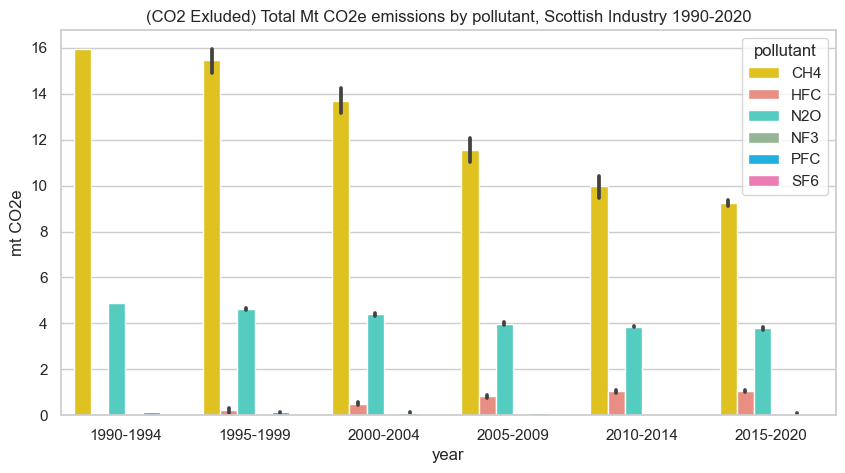

In [8]:
#Calculating the total emissions per each pollutant EXCLUDING CO2
plt.figure(figsize=(10,5))

no_co2_filter = emissions_by_year[~(emissions_by_year['pollutant'] == 'CO2')]

ax1 = sns.barplot(data=no_co2_filter, x='grouped_year', y='mt_co2e', hue='pollutant',
                 palette=colours_dict)
plt.title('(CO2 Exluded) Total Mt CO2e emissions by pollutant, Scottish Industry 1990-2020')
plt.xlabel('year')
plt.ylabel('mt CO2e')
plt.show()

Interestingly, there is an increasing trend in HFCs over the years. HFCs were adopted to replace chlorofluorocarbons (CFCs) in the 1990's after they were discovered to damage the ozone layer. 

However, they are a GHG and thus contribute to global warming, so they should be being phased out over time. Nonethless, their role as an intermittent technological replacement explains their increase over time. Let's look at the figures for individual years below.

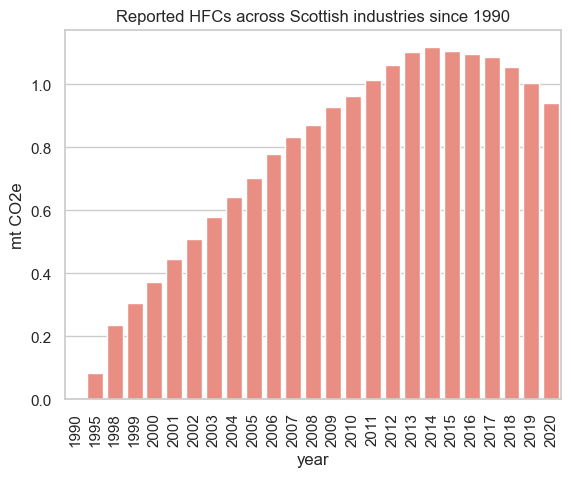

In [9]:
HFCs = df[df['pollutant'] == 'HFC'].groupby('emission_year')['mt_co2e'].sum()
HFCs = pd.DataFrame(HFCs).reset_index()

ax1 = sns.barplot(data=HFCs, x='emission_year', y='mt_co2e', color='salmon')
plt.title('Reported HFCs across Scottish industries since 1990')
plt.xlabel('year')
plt.xticks(rotation=90)
plt.ylabel('mt CO2e')
plt.show()

There is a decreasing trend in recent years, reflecting a move away from HFCs in industry toward more climate-friendly replacements (see [this page](https://climate.ec.europa.eu/eu-action/fluorinated-greenhouse-gases/climate-friendly-alternatives-hfcs_en) from the European Commision for some examples).

In [10]:
def pollutant_tracker(dataframe,pollutant,colour):
    #groupby statement to sum each pollutant by year and turn to dataframe
    pollu_df = dataframe[dataframe['pollutant'] == pollutant].groupby('emission_year')['mt_co2e'].sum()
    pollu_df = pd.DataFrame(pollu_df).reset_index()

    sns.barplot(data=pollu_df, x='emission_year', y='mt_co2e', color=colour)
    plt.title('Reported {} across Scottish industries since 1990'.format(pollutant))
    plt.xlabel('year')
    plt.xticks(rotation=90)
    plt.ylabel('mt CO2e')
    plt.show()

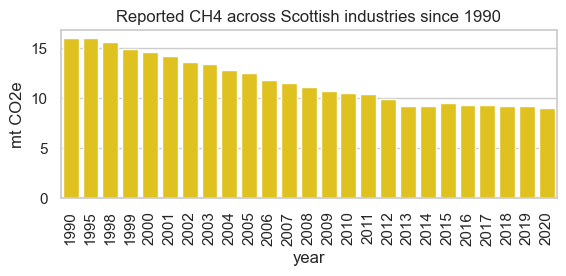

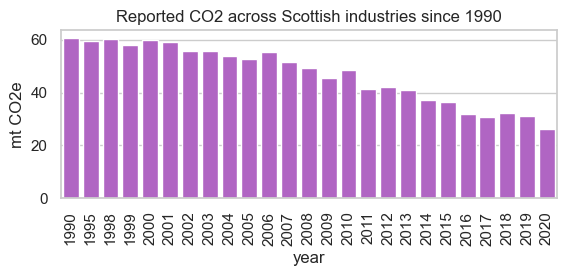

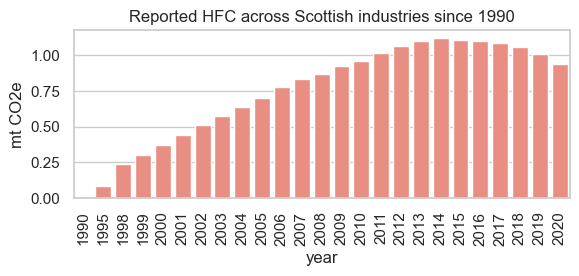

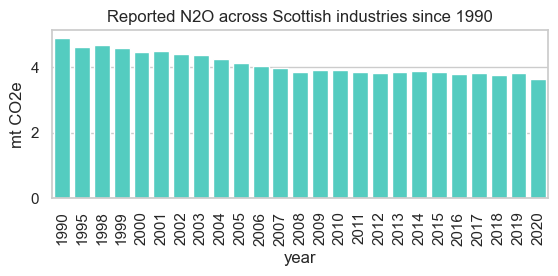

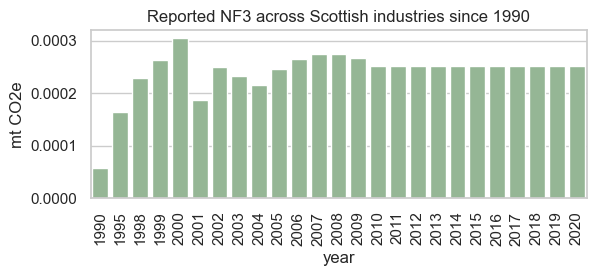

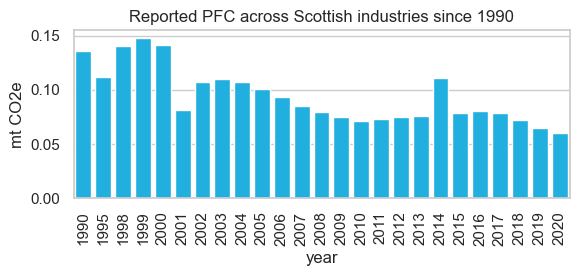

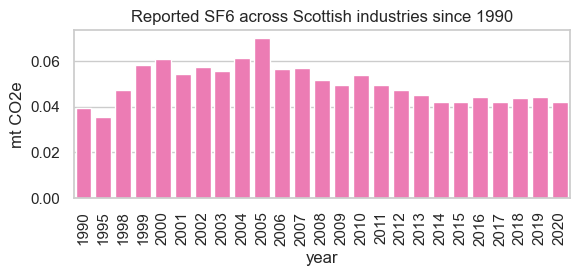

In [11]:
for i in range(1,2):
    plt.subplot(2,1,i)
    pollutant_tracker(df,'CH4','gold')
    plt.subplot(2,1,i)
    pollutant_tracker(df,'CO2','mediumorchid')
    plt.subplot(2,1,i)
    pollutant_tracker(df,'HFC','salmon')
    plt.subplot(2,1,i)
    pollutant_tracker(df,'N2O','turquoise')
    plt.subplot(2,1,i)
    pollutant_tracker(df,'NF3','darkseagreen')  
    plt.subplot(2,1,i)
    pollutant_tracker(df,'PFC','deepskyblue')    
    plt.subplot(2,1,i)
    pollutant_tracker(df,'SF6','hotpink')    

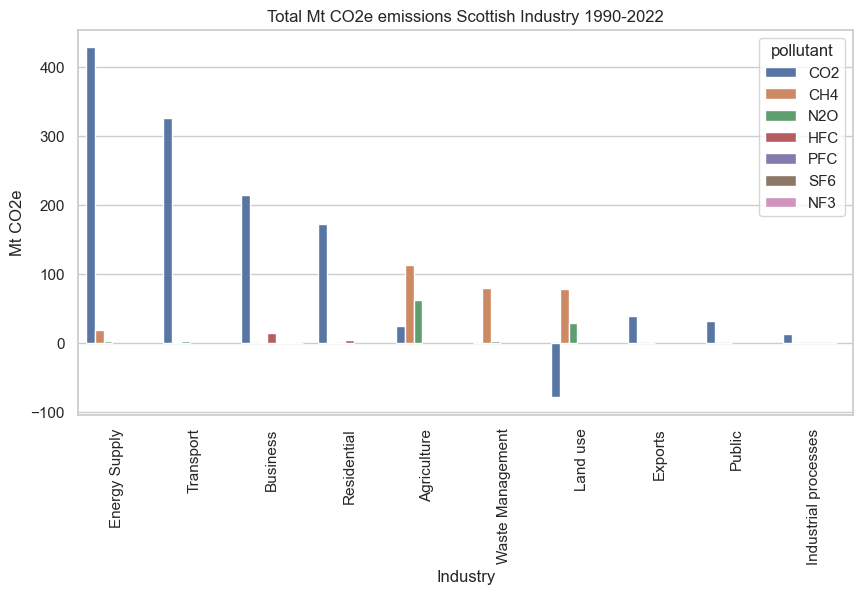

In [12]:
#renaming Land use industry for clarity in data vis 
df['ncformat'] = df['ncformat'].replace('Land use, land use change and forestry','Land use', regex=True)
#Calculating the industry total emissions - for more details, see previous project

plt.figure(figsize=(10,5))

industry_total = df.groupby(['ncformat', 'pollutant'])['mt_co2e'].sum()
industry_total = pd.DataFrame(industry_total).reset_index().sort_values(by='mt_co2e', ascending=False)
ax1 = sns.barplot(data=industry_total, x='ncformat', y='mt_co2e', hue='pollutant')
plt.title('Total Mt CO2e emissions Scottish Industry 1990-2022')
plt.xlabel('Industry')
plt.ylabel('Mt CO2e')
plt.xticks(rotation=90)
plt.show()

In [13]:
def industry_tracker(dataframe,industry):
    #groupby statement to sum each pollutant by year and turn to dataframe
    industry_df = dataframe[dataframe['ncformat'] == industry].groupby('pollutant')['mt_co2e'].sum()
    industry_df = pd.DataFrame(industry_df).reset_index()

    sns.barplot(data=industry_df, x='pollutant', y='mt_co2e', palette=colours_dict)
    plt.title('Reported pollutants in {} since 1990'.format(industry))
    plt.xlabel('pollutant')
    plt.xticks(rotation=90)
    plt.ylabel('mt CO2e')
    plt.show()

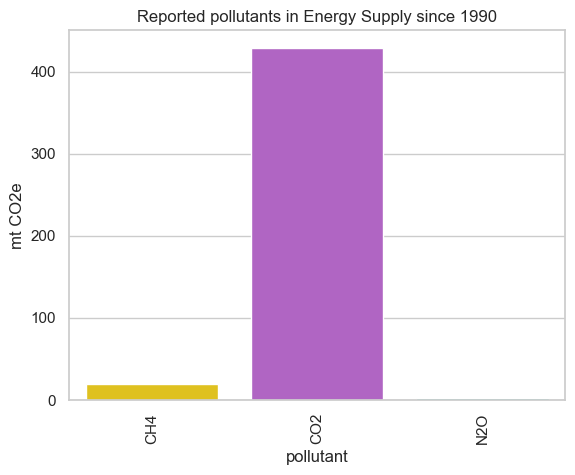

In [14]:
industry_tracker(df, 'Energy Supply')

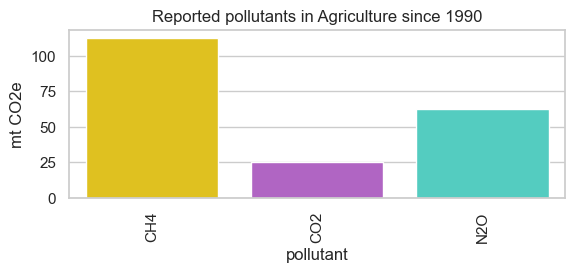

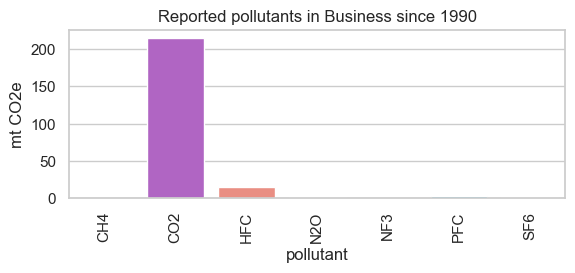

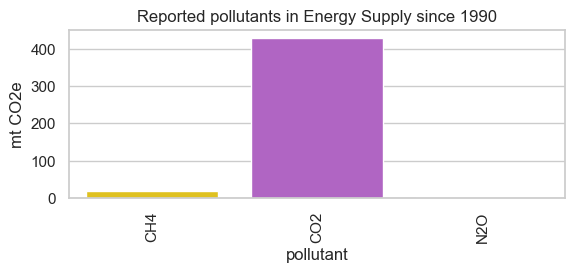

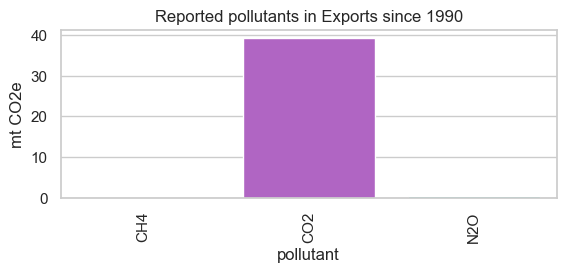

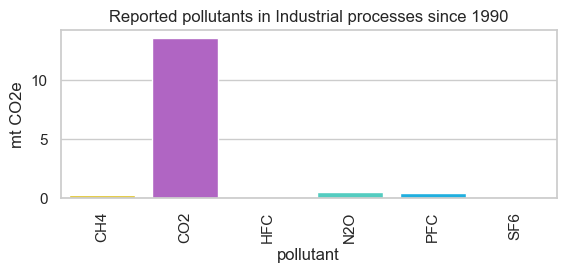

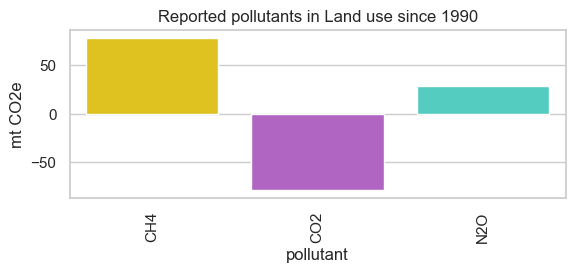

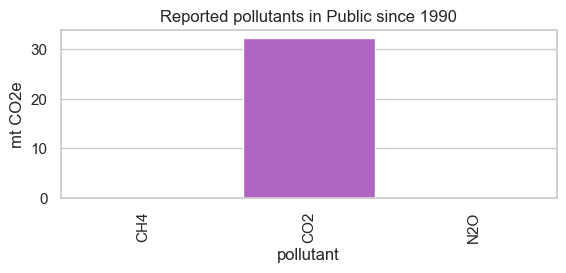

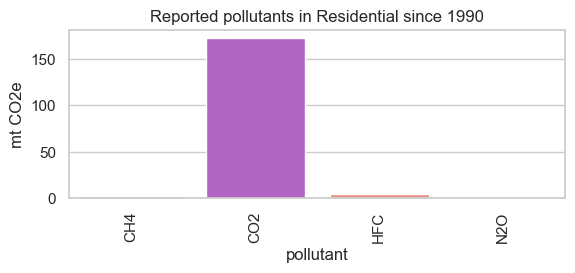

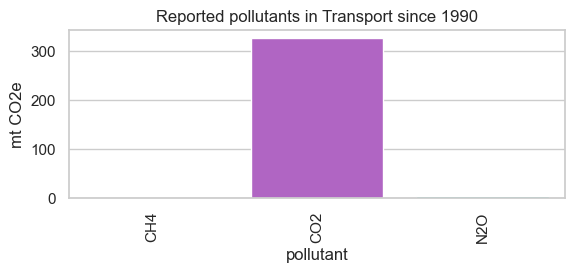

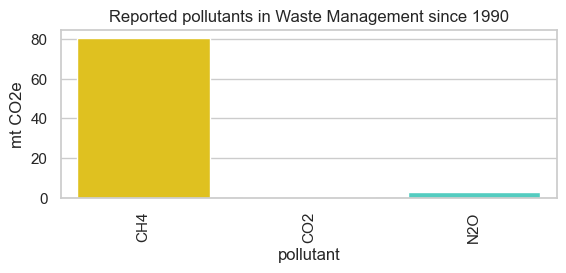

In [15]:
for i in range(1,2):
    plt.subplot(2,1,i)
    industry_tracker(df,'Agriculture')
    plt.subplot(2,1,i)
    industry_tracker(df,'Business')
    plt.subplot(2,1,i)
    industry_tracker(df,'Energy Supply')
    plt.subplot(2,1,i)
    industry_tracker(df,'Exports')
    plt.subplot(2,1,i)
    industry_tracker(df,'Industrial processes')  
    plt.subplot(2,1,i)
    industry_tracker(df,'Land use')    
    plt.subplot(2,1,i)
    industry_tracker(df,'Public')   
    plt.subplot(2,1,i)
    industry_tracker(df,'Residential')   
    plt.subplot(2,1,i)
    industry_tracker(df,'Transport')   
    plt.subplot(2,1,i)
    industry_tracker(df,'Waste Management')   

We can see from the above that not every industry has reported every pollutant. This is largely OK - it's sensible to believe that not every industry will be creating the same pollutants, and it makes sense that some are reporting mostly just CO2, such as Transport.

However, some omissions are glaring. For example, why is SF6 missing from Energy Supply, which presumably includes the electrical grid?